# Data Science - Final Project

## 1. Introduction

The amount of financial information readily available to the rational investor is never ending. Common financial theory assumes that the rational investor is in a mental position to obtain all this information and process it in a rational manner in order to arrive at the optimal investment decision balancing expected return with the riskiness of the investment (Berk & Demarzo, 2019). However, especially qualitative data can be ambiguous to process coherently in order to form consistent predictions of the stock markets reaction to new information. This ambiguity has also been a cornerstone in the behavioural finance literature, which argue that even the most sophisticated investors, e.g. institutional investors, are not able to obtain and process all available information in a coherent and rational way (Ackert & Deaves, 2010). 

Furthermore, one issue with the qualitative information available is the sheer size of the information, another issue is how to interpret the information. One could argue that words and definitions change meaning and importance over time which makes consistent predictions for the human brain even more challenging. An obvious example of how words change meaning over time is the current Coronavirus. Before 2019, Corona was to the majority nothing else than a beer brand, but post 2019 the majority will attribute Corona a negative effect in terms of the equity market.     

Based on the above, this project seeks to investigate whether modern data science applications can disentangle useful information among the large amount of clutter in the US business news. Furthermore, the project will investigate whether investors change their perceptions of qualitative information over time and to what extent this is priced into the US equities.


## 2. Methodology

The following section will present the overall research questions the project seeks to answer. Furthermore, the section will give the overall research design for the project.

### 2.1 Research Question

As mentioned in section 1 this project will use the qualitative information contained in the US business news to investigate whether words change meaning over time. The overall research question for this project is highlighted below.

**Research question:**

To what degree does the change in word semantics over time affect the predictive power of US financial news with respect to predicting future returns of the S&P 500 sectors?

### 2.2 Research Design

This section will present the data science approaches and models that constitute the project’s research design. 

The underlying data for this project is business news articles from the US network CNBC. However, in order to fit a machine learning model on qualitative data the data needs to be preprocessed thoroughly for the model to extract sufficient information in order to form quality predictions. 

Therefore, the first part of the project will present how data has been sourced from CNBC’s website and elaborately explain the NLP operations that have been completed in the preprocessing in order to arrive at a dataset only with the words that are expected to carry the most information in relation to returns. Furthermore, instead of providing the machine learning model a dataset with a conventional bag-of-words, the machine learning model is provided with a matrix of embedded words. This method is better at capturing the context of a word in a document and therefore grasps a deeper understanding of the semantics of the words. The NLP preprocessing and word embedding execution are thoroughly explained in section 4.

For the prediction the project will utilise an artificial neural network model, as these advanced types of machine learning models are able to capture the possible non-linear relationship between different sectors. An example is when oil prices increase the oil exploration sector is positively impacted but airlines are negatively impacted. However not necessarily in a linear fashion. Furthermore, artificial neural network models are able to predict multiple outputs which is utilised in this project with eleven sectors comprising the S&P 500 index plus the total index.



## 3. Data Sourcing 

### 3.1 Sourcing of Input Variables

The project is based on an unique dataset sourced and compiled by ourselves. The dataset consists of 376,678 news articles that have been scraped from the leading US business network CNBC which have open access to their historical news article. The historical period for the news articles dates back to November 27th 2006 and ends at November 18th 2020.

CNBC has been utilised as the source for the data as the primary focus for the articles is business news, which, with all else equal, is expected to increase the signal-to-noise ratio for index returns compared to other news sources with a more broad and general focus as e.g. the New York Times or Washington Post. Furthermore, CNBC labels all their articles which makes it potentially easier to automatically label all articles in the scraping process.  

The web scraping has been caught out with a combination of requests, to get http responses and website content, and BeautifulSoup, to parse the content and extract the relevant parts of said response. 

The data scraping process is two-fold: First, we crawl through CNBC’s entire sitemap structure to find all the relevant article links. After further investigation, we find that CNBC conveniently structure their sitemap in a very structured way, which is easy to replicate. CNBC lists links to all their articles by date. All the links to their articles for a specific date can be accessed through their sitemap with the following link structure: https://www.cnbc.com/site-map/{year}/{month}/{day}/. The code for gathering all links to the articles are given below:

For each date between November 27th 2006 (Their first date with articles) to November 18th 2020, we simply access the corresponding archive-site and scrape the contents. Since CNBC are using in-line CSS directly in their <head></head>-tags, the site is usually heavy to parse. To combat this, we chop off the entire <head> section, by converting the contents, we get from requests to a string and then look for the <body> tag (which initiates their “physical” website structure). 
Then we run the html response through BeautifulSoup with a SoupStrainer; BeautifulSoup parses the entire document, but the SoupStrainer ensures that it only parses the relevant links. This decreases parsing-time, as it simply skips all the irrelevant elements. We run the parser with BeautifulSoup’s default underlying parser: lxml. 
When we have run the parser, we can use BeautifulSoups function ‘find_all’ to simply construct a list of all the relevant links, and from here we can append the href-tags (actual links) to a list, which we can pass to our next function: The actual scraper. A line for line description can be found in the appendix.

The scraper operates much like our crawler. The main difference is that we instantiate a requests session, which slightly speeds up our scraper, since CNBC’s servers reside in the US. By using the same session in the scraping process, we save a couple of hundred milliseconds for each scraping site, since the required number of http requests can be lowered. Please note that a detailed description line for line can be found in the appendix. It is also worth to note, that these articles have been scraped over multiple computers and multiple sessions (usually scraping 4,000-10,000 articles per session), as it took well above 80 hours of runtime to scrape all ~370,000 articles. 

The next function is the dataset collector. This function takes all of our csv-files with scraped articles and collects them to a single dataframe.

First, we find all csv-files in the datasets folder. Then we simply load them in one at a time and add them to a list called ‘frames’. We can then use the pandas function concat to concatenate all the datasets into one dataframe. Now, we have all our scraped articles from 2006 to 2020 in a single dataset ready to preprocess. Please find a detailed line for line explanation in the appendix. Our final dataset will look like this:

In [ ]:
all_articles.head()

### 3.2 Sourcing of Output Variables

As mentioned in section 2.1 the output variable for this project is the return for each of the eleven sectors in the S&P 500 index plus the total index. The eleven sectors are Energy, Materials, Industrials, Consumer Discretionary, Consumer Staples, Health Care, Financials, Information Technology, Communication Services Utilities and Real Estate (S&P Global, 2018). 

Daily close prices adjusted for dividends have been sourced from the financial database Bloomberg for all eleven sectors as well as the total index. The index prices have been sourced from January 1st 2006 to November 20th 2020.  

Daily close price adjusted for dividends assume that all dividends are reinvested. Based on the sourced prices we’ve calculated the daily dividend adjusted return for each i sector as below and get the following daily return for our preliminary output variables. 
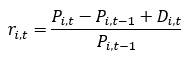

In [54]:
stocks.head()

,Dates,SPTR INDEX,SPTRINFT INDEX,SPTRENRS INDEX,SPTRFINL INDEX,SPTRHLTH INDEX,SPTRINDU INDEX,SPTRCOND INDEX,SPTRUTIL INDEX,SPTRMATR INDEX,SPTRCONS INDEX,SPTRTELS INDEX,SPTRRLST INDEX
0,2006-01-02,1887.941,343.33,493.50,541.1447,430.99,349.57,293.03,255.94,238.53,300.40,158.07,166.8761
1,2006-01-03,1918.959,350.30,515.75,550.1310,436.59,352.13,295.92,260.95,243.17,302.41,158.82,171.0608
2,2006-01-04,1926.387,354.18,517.47,549.3696,440.39,352.98,295.97,261.15,244.70,303.18,160.24,171.8636
3,2006-01-05,1926.439,356.97,512.07,551.3623,439.73,351.92,296.42,259.46,244.45,301.81,160.85,173.3726
4,2006-01-06,1945.015,362.72,523.62,554.2263,442.92,353.90,299.10,261.93,247.46,303.19,162.18,175.6234


Plotting the index returns over time:

In [55]:

indexes = pd.read_csv('bb_prices.csv')
indexes['Dates'] = pd.to_datetime(indexes['Dates'])

fig2 = px.line(indexes, x='Dates', y=indexes.columns[2:], color_discrete_sequence=px.colors.qualitative.D3)
fig2.update_xaxes(showgrid=False)
fig2.show()

## 4. Data Pre-processing

This section will lay out how the textual data is pre-processed prior to be used as inputs to our neural network model.

The pre-processing includes cleaning the textual data retrieved from our web scraping in two steps. 

First, a large portion of the scraped news articles contained unicode characters and other irrelevant characters which we consider as clutter in our data. This is sorted by applying regular expressions to remove all special unicode characters video timestamps and image sources left in our news articles. Moreover, we remove all commas and convert any potential double-spaces to single-spaces. We also convert all apostrophes in abbreviations including “n’s” like “wasn’t” since some of these apostrophes already have been removed by the regular expression functions. This last step is needed in order to ensure that such abbreviations have the same presentation in our text corpus.

In [1]:
def remove_clutter(text):

    """
    This function takes a string and removes what we consider as clutter
    in our data. This includes things such as special unicode characters
    and video timestamps.
    """

    # Importing neccesary packages
    import re

    # Trying to remove special unicode characters. ord() returns the unicode
    # index of the character - We then check that whether that character
    # index if less than 127. If it is so, it is not a special character
    # and we include it.
    text = ''.join([x for x in text if ord(x) < 127])

    # Trying to remove video annotation. We are using a regular expression,
    # to find any pattern that matches the word video followed by a
    # timestamp (length of video). We believe this is just clutter in
    # our data as well.
    text = re.sub(r'VIDEO([0-9]|[0-9]{2}):[0-9]{4}:[0-9]{2}', ' ', text)

    # Trying to remove image references. Whenever an article contains an
    # image, the page returns a string representation of the image as the
    # source "Getty Images". We remove this representation, as it brings
    # no value to the analysis.
    text = text.replace('Getty Images', '')

    # We now remove commas, apostrophes, and double spaces. We introduce
    # double spaces in the line above, however this could mess up our
    # tokenization, so we simply convert any doublespaces to single spaces.
    # We remove apostrophes after n's to normalize contracted words like
    # wasn't, couldn't etc. Some of these words are already normalized
    # since some of these apostrophes already have been remove by the regex
    # unicode decluttering.
    text = re.sub(r',','', text)
    text = re.sub(r"n'",'n', text)
    text = re.sub(r'  ',' ', text)

    # Finally, we return the decluttered text.
    return text

In [ ]:
# Now, we store all tokens that pass our requirements in a list for each
# article. That means that each article will have their own
# list of tokens.
article_tok = [token.lemma_.lower() for token in article if _
    token.is_alpha _
    and not token.is_stop _
    and token.pos_ in ['NOUN', 'PROPN', 'ADJ', 'ADV', 'VERB'] _
    and token.ent_type_ not in ['PERSON', 'MONEY', 'PERCENT', 'LOC', 'DATE', 'TIME', 'QUANTITY', 'ORDINAL'] _
    and len(token)>1]

## 5. Model Architecture

### 5.1 Artificial Neural Networks 

As mentioned in the research design, we base our predictive modelling on a neural network due to the assumption that it will be better at capturing the expected non-linear relationship between embeddings from news articles and returns of the elleven sectors. Analyzing text and its semantic meaning is in itself a complex task, and when attempting to utilize these semantics to predict something as complex as returns the complexity is increased significantly. Neural networks are capable of perceiving patterns of complex nature due to its ability to connect neurons with different activation functions in layers. Thus, our model architecture will be better equipped to solve our predictive problem by implementing a neural network.

Additionally, deep learning is applicable for our model architecture, as it allows the neural network to learn increasingly abstract representations of the data through implementation of subsequent layers. It integrates a depth in the model that facilitates its ability to comprehend multiple levels of abstraction.

### 5.2 One-to-many Architecture

An overarching feature of the model architecture is the number of different inputs and the number of outputs for the model. As mentioned multiple times throughout the project, the predictive model will predict [elleven] sector returns one week ahead in time for each day. Therefore, the model will have multiple output neurons with a total number of [eleven]. The inputs for the model consist solely of an embedded matrix as mentioned in section [x]. Eventhough the input is in a form of a matrix it is considered as a single input. Therefore, the predictive model will be based on a one to many architecture as illustrated below. 


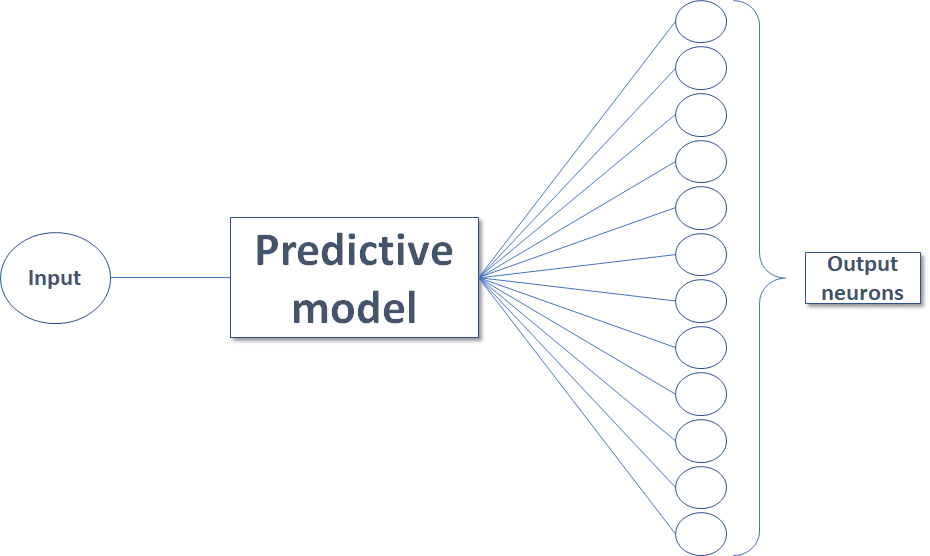

### 5.3 Recurrent vs. Convolutional Neural Networks 

Considering our features consist of text, both recurrent neural networks (RNNs) and convolutional neural networks (CNNs) are relevant to include in our model architecture. 

RNN’s capture sequential information so that past states, carrying relevant information, are considered when making predictions for the future. This is accomplished by allowing past information to persist through integration of an internal loop into the network. 

With CNNs, connections between nodes are not cyclical. Instead, it is based on convolutions that find patterns by filtering across the whole input space. It varies the size of the filters and concatenates outputs, which enables the model to identify patterns of differing sizes. Additionally, CNNs thrive at extracting local and position-invariant features, which is especially applicable for classifying tasks such as sentiment analysis. 

RNNs are more applicable when classification depends on long range semantic dependency. Overall, the two approaches differ in how they recognize patterns. RNNs recognize patterns across time whereas CNNs recognize patterns across space. 

Considering that the financial articles will be utilized to predict returns, time is introduced as an important factor, where the vocabulary with its underlying themes and meaning will drive the predictive power of the model. It is expected that the vocabulary will evolve over time and its predictive power of returns only exists until the sector prices are adjusted to the knowledge in the articles. Thus, RNNs is chosen over CNNs, as it seems like such a model will be better able to recognize predictive patterns when trained over time.


### 5.4 Long Short-Term Memory networks as a solution for vanishing gradient

A weakness of RNNs are the vanishing and exploding gradient, where derivatives are susceptible to vanishing or exploding effects. This occurs due to the multiplicative relationship between layers and time-steps. Adding layers on layers one risks dilution of the knowledge of previous layers. A solution for this is Long Short-Term Memory (LSTM) networks, which is capable of learning long-term dependencies. It implements a way to carry information across many time steps. Information is guided through the layers by gates, which determines how much of the information is allowed through each layer. Thus, by implementing gates the LSTM network is able to only remember information that is beneficial for the model while forgetting information that is detrimental for it. Based on the above outline, the LSTM neural network model will be utilised in this project. 

### 5.5 Illustration of Architecture

## 6. Modelling and fine-tuning

**Avoid overfitting with dropout layers:**

To avoid overfitting we integrate dropout regularization layers to the network. This method probabilistically removes neurons during training of the neural network, which simulates different networks structures. Thereby overfitting is reduced, as co-adaptation is avoided and noise is heightened, which forces nodes probabilistically to take on more responsibility. Additionally, dropout regularization is a computationally inexpensive method. This is consistent with our already scarce computational resources. (Brownlee, 2018)


## 7. Findings

Plot MSE of training and validation set over number of epochs:

In [19]:
# Using plotly.express
import plotly.express as px
import pandas as pd

df = pd.read_csv('epoch_tuning.csv', names=['epochs', 'train', 'validation'], header=0)
fig = px.line(df, x='epochs', y=["train","validation"], color_discrete_sequence=['cornflowerblue', 'indigo'])
fig.update_xaxes(title_text='Epochs', showgrid=False)
fig.update_yaxes(title_text='MSE')
fig.show()

In [27]:
# Time-series 
df = pd.read_csv('', names=['dates', 'train', 'validation'], header=0)
fig2 = px.line(df, x='dates', y=['train','validation'], range_x=['2016-07-01','2016-12-31'])
fig2.show()

FileNotFoundError: [Errno 2] File  does not exist: ''

### Validation metrics

In [48]:
# import untrainable validation metrics
un_val = pd.read_csv('validation_metrics_trainable_false.csv', names=['quarters', 'train_un', 'validation_un'], header=0)
# import trainable validation metrics
tr_val = pd.read_csv('validation_metrics_train.csv', names=['train', 'validation'], header=0, usecols=[1,2])

# The two dataframes are merged in order to be able to plot training and validation together
val_metrics = pd.concat([un_val, tr_val], axis=1)
val_metrics.head()

,quarters,train_un,validation_un,train,validation
0,0,0.731249,1.335083,0.658779,1.319738
1,1,0.412664,0.633601,0.321222,0.937847
2,2,0.242292,1.124508,0.258578,1.332857
3,3,0.233775,0.625454,0.199456,0.644287
4,4,0.207904,0.623143,0.147387,0.591442


In [50]:
# Plot untrained and trained training sets

fig4 = px.line(val_metrics, x='quarters', y=["train_un","train"], color_discrete_sequence=['cornflowerblue', 'indigo'])
fig4.update_xaxes(title_text='Quarters', showgrid=False)
fig4.update_yaxes(title_text='MSE')
fig4.show()

In [51]:
# Plot untrained and trained validation sets

fig4 = px.line(val_metrics, x='quarters', y=["validation_un","validation"], color_discrete_sequence=['cornflowerblue', 'indigo'])
fig4.update_xaxes(title_text='Quarters', showgrid=False)
fig4.update_yaxes(title_text='MSE')
fig4.show()

## 8. Conclusion